In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
#--------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Lendo a base de dados

df = pd.read_csv('carbase3.csv', encoding='latin1')

In [2]:
# Visualizando os 5 primeiros registros

df.head()


,modelo,anoModelo,mesReferencia,anoReferencia,valor,estado
0,Integra GS 1.8,1992,11,2016,13041.0,good
1,NSX 3.0,1995,3,2013,52339.0,excellent
2,Integra GS 1.8,1992,3,2018,12423.0,good
3,Legend 3.2/3.5,1998,5,2016,31067.0,regular
4,Legend 3.2/3.5,1998,2,2019,26381.0,excellent


In [3]:
# Verificando os 5 últimos registros

df.tail()

,modelo,anoModelo,mesReferencia,anoReferencia,valor,estado
994,145 Quadrifoglio 2.0,1999,1,2013,15840.0,excellent
995,145 Elegant 1.7/1.8 16V,1999,2,2003,21760.0,good
996,166 3.0 V6 24V,2003,6,2021,45177.0,regular
997,2300 TI/TI-4,1986,4,2006,6498.0,good
998,Spider 2.0/3.0,1997,2,2006,58625.0,excellent


In [4]:
# Informação sobre a tabela

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   modelo         999 non-null    object 
 1   anoModelo      999 non-null    int64  
 2   mesReferencia  999 non-null    int64  
 3   anoReferencia  999 non-null    int64  
 4   valor          999 non-null    float64
 5   estado         999 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [5]:
# Breve descrição da tabela

df.describe()

,anoModelo,mesReferencia,anoReferencia,valor
count,999.000000,999.000000,999.000000,999.000000
mean,2002.541542,6.391391,2013.007007,49106.580581
std,11.073630,3.454828,5.278511,36525.392530
min,1986.000000,1.000000,2001.000000,3310.000000
25%,1995.000000,3.000000,2009.000000,16839.500000
50%,1998.000000,6.000000,2013.000000,36279.000000
75%,2005.000000,9.000000,2018.000000,67763.500000
max,2022.000000,12.000000,2022.000000,142306.000000


In [6]:
# Fazendo a soma dos valores nulos

df.isnull().sum()

modelo           0
anoModelo        0
mesReferencia    0
anoReferencia    0
valor            0
estado           0
dtype: int64

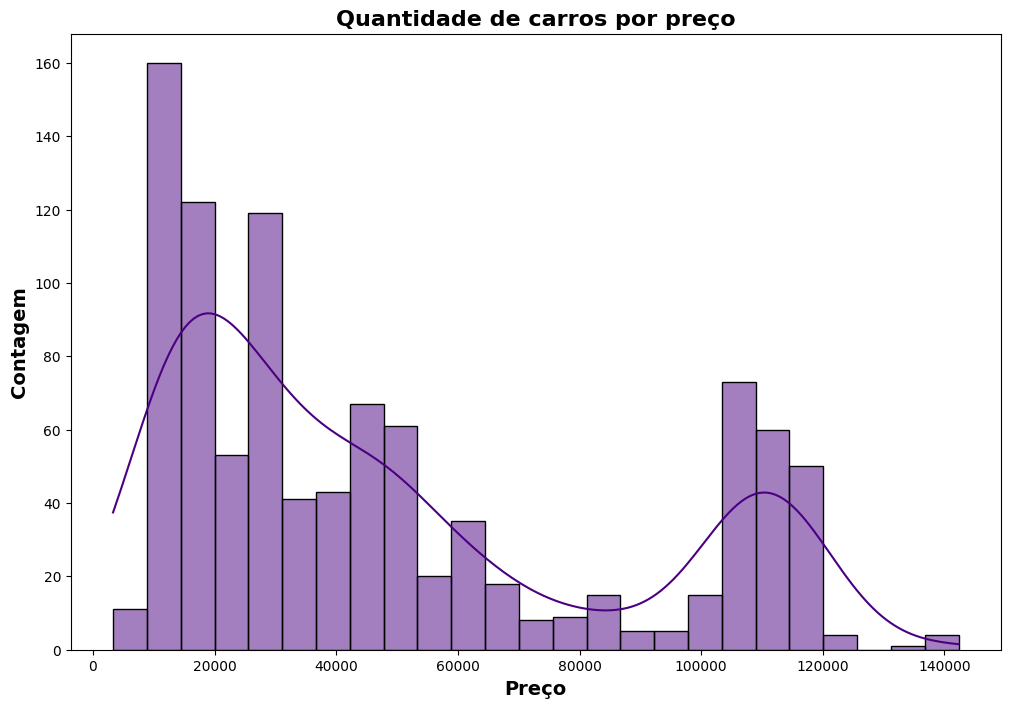

In [7]:
# Distribuição de preço
plt.figure(figsize=(12, 8))
sns.histplot(df['valor'], kde=True, bins=25, color='indigo')
plt.title('Quantidade de carros por preço', fontsize=16, fontweight='bold')
plt.xlabel('Preço', fontsize=14, fontweight='bold')
plt.ylabel('Contagem', fontsize=14, fontweight='bold')
plt.show()

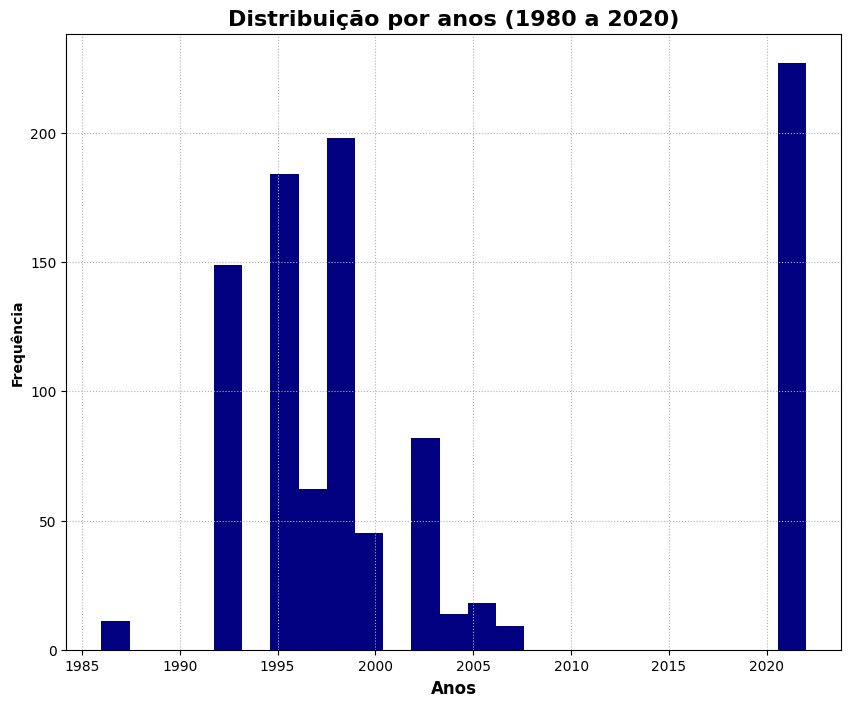

In [8]:
# Distribuição por anos

plt.figure(figsize=(10, 8)) # criando e definindo o tamanho da figura
df['anoModelo'].plot(kind='hist', bins=25, color= 'navy') # frequência da coluna 'year' e definindo cor
plt.title('Distribuição por anos (1980 a 2020)', fontsize= 16, fontweight='bold') # título
plt.grid(True, linestyle=':') # linha de divisão do gráfico
plt.ylabel('Frequência', fontweight= 'bold') # legenda y
plt.xlabel('Anos', fontweight= 'bold', fontsize= 12) # legenda x
plt.show(); # plotando o gráfico

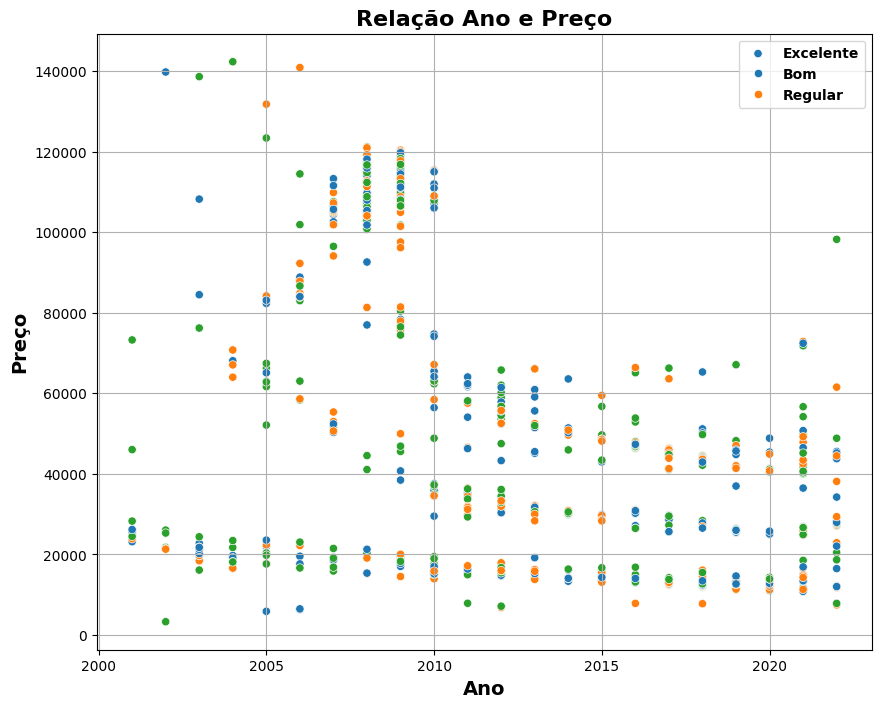

In [9]:
# Gráfico scatter, Ano x Year, adicional = condição

plt.figure(figsize= (10, 8)) # criando e definindo tamanho da figura
sns.scatterplot(data=df, x='anoReferencia', y='valor', hue='estado') # passando os parâmetros de visualização e comparação
plt.title('Relação Ano e Preço', fontsize = 16, fontweight= 'bold') # título
plt.xlabel('Ano', fontsize= 14, fontweight= 'bold') # legenda x
plt.ylabel('Preço', fontsize= 14, fontweight= 'bold') # legenda y
plt.legend(labels=['Excelente', 'Bom', 'Regular'], loc='upper right', fontsize= 'medium', prop={'weight':'bold'}) # legenda das condições
plt.grid(True, linestyle= '-') # mostrando e alterando estilo da figura
plt.show() # plotando o gráfico

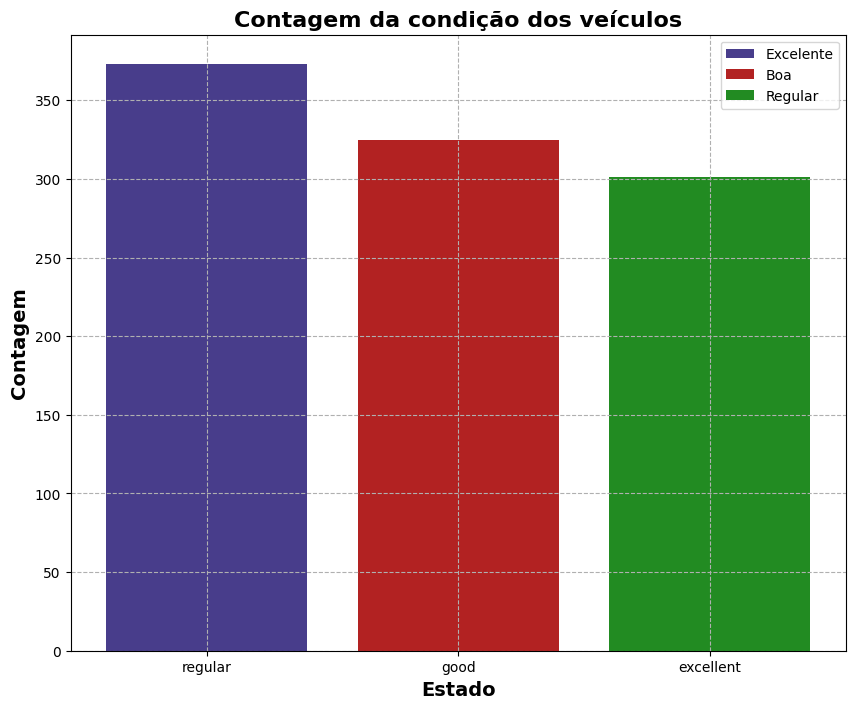

In [10]:
# Contagem da condição dos veículos

contagem = df['estado'].value_counts() # variável que recebe a contagem da condição dos veículos
cores = ['darkslateblue', 'firebrick', 'forestgreen'] # cores das barras


fig, ax = plt.subplots(figsize=(10, 8)) # criando a figura
barras = ax.bar(contagem.index, contagem, color=cores) # criando as barras
plt.title('Contagem da condição dos veículos', fontsize=16, fontweight='bold')
plt.xlabel('Estado', fontsize=14, fontweight='bold') # legenda x
plt.ylabel('Contagem', fontsize=14, fontweight='bold') # legenda y
legendas = ['Excelente', 'Boa', 'Regular'] # legendas da descrição
plt.legend(barras, legendas, loc='upper right', fontsize='medium') # descrição
plt.grid(True, linestyle='--') # mostrando e defindo estilo do grid
plt.show(); # plotando a figura

In [11]:
# Verificar e tratar valores faltantes
df = df.dropna()

# Separar features e target
X = df.drop(columns=['valor', 'modelo'])
y = df['valor']

# Definir pré-processamento para variáveis categóricas e numéricas
categorical_features = ['estado']
numeric_features = ['anoReferencia', 'anoModelo']

# Criar transformers para pré-processamento
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Combinar transformers em um ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Criar pipeline com pré-processador e modelo de Regressão Linear
model = Pipeline(steps=[('preprocessor', preprocessor),('regressor', LinearRegression())])

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 14963.533226439746


In [12]:
# Pré-processamento dos dados
# Codificar colunas categóricas
label_encoder = LabelEncoder()
df['modelo'] = label_encoder.fit_transform(df['modelo'])
df['estado'] = label_encoder.fit_transform(df['estado'])

# Selecionar features e target
X = df[['modelo', 'anoModelo', 'mesReferencia', 'anoReferencia', 'estado']]
y = df['valor']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construir a rede neural
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Avaliar o modelo
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {loss}')

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliação do desempenho
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Epoch 1/100


c:\Users\JOÃO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4074855680.0000 - val_loss: 3774419456.0000
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3738515456.0000 - val_loss: 3774242816.0000
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3845768704.0000 - val_loss: 3773941248.0000
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3662834944.0000 - val_loss: 3773467904.0000
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3857891328.0000 - val_loss: 3772730624.0000
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3835448064.0000 - val_loss: 3771635200.0000
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3793806592.0000 - val_loss: 3770012416.0000
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3540407296.0000 - val_loss: 3767801856.0000
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3729675776.0000 - val_loss: 3764788736.0000
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3688872960.0000 - val_los